In [8]:
from astropy.table import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import os

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [6]:
#add in mag err info
# cat_name = 'COSMOS'
# pcat_irac_matched = Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits')
# pcat_err = Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_pcat211221_mags_gals.fits')
# if cat_name == 'COSMOS':
#     pcat_err = pcat_err['u_err','uS_err','g_err','r_err','i_err','z_err','y_err','Y_err','J_err','H_err','Ks_err']
# else:
#     pcat_err = pcat_err['u_err','uS_err','g_err','r_err','i_err','z_err','y_err']

# cat = hstack([pcat_irac_matched,pcat_err],join_type='exact')
# cat.write('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits',overwrite=True)

In [7]:
# pcat_irac_matched = Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/COSMOS_deep_pcat211221_mags_gals_CH1_CH2.fits')
# fuv_col = Column(data=np.ones(len(pcat_irac_matched))*-99.0, name='FUV')
# fuverr_col = Column(data=np.ones(len(pcat_irac_matched))*99.0, name='FUV_err')
# nuv_col = Column(data=np.ones(len(pcat_irac_matched))*-99.0, name='NUV')
# nuverr_col = Column(data=np.ones(len(pcat_irac_matched))*99.0, name='NUV_err')

# pcat_irac_matched.add_columns([fuv_col,fuverr_col,nuv_col,nuverr_col])
# pcat_irac_matched.write('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits',overwrite=True)

In [10]:
# for cat_name in ['COSMOS','ELAIS','DEEP']:
#     pcat_irac_matched = Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits')
#     pcat_irac_matched.rename_column('MAG_AUTO_CH2','MAG_AUTO_CH2_CORR')
#     pcat_irac_matched.rename_column('MAGERR_AUTO_CH2','MAGERR_AUTO_CH2_CORR')
#     pcat_irac_matched.write('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits',overwrite=True)

In [12]:
for cat_name in ['COSMOS','ELAIS','DEEP']:
    pcat_irac_matched = Table.read('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits')
    # ch1_col = pcat_irac_matched['MAG_AUTO_CH1_CORR']
    # ch2_col = pcat_irac_matched['MAG_AUTO_CH2_CORR']
    # ch1_col[np.isnan(ch1_col)]=-99.0
    # ch2_col[np.isnan(ch2_col)]=-99.0
    
    ch1err_col = pcat_irac_matched['MAGERR_AUTO_CH1_CORR']
    ch2err_col = pcat_irac_matched['MAGERR_AUTO_CH2_CORR']
    ch1err_col[ch1err_col==-99.0]=99.0
    ch2err_col[ch2err_col==-99.0]=99.0
    
    pcat_irac_matched.write('/Volumes/LejaySSD/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_deep_pcat211221_mags_gals_CH1_CH2.fits',overwrite=True)

#### read in v9pcat
v9pcat: v9 catalog photometry and pcat redshifts

In [48]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats/'

In [11]:
# add z_combine
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep']:
    cat = Table.read(graham_output_dir+'v9pcat_'+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')
    
    z_combine = []
    for gal in tqdm(cat):
        cond_ch1 = ((gal['MAG_AUTO_CH1_CORR'] > 0.) & (gal['MAG_AUTO_CH1_CORR'] < 50.) & (gal['MAGERR_AUTO_CH1_CORR'] > 0.) & (gal['MAGERR_AUTO_CH1_CORR'] < 0.5))
        cond_ch2 = ((gal['MAG_AUTO_CH2_CORR'] > 0.) & (gal['MAG_AUTO_CH2_CORR'] < 50.) & (gal['MAGERR_AUTO_CH2_CORR'] > 0.) & (gal['MAGERR_AUTO_CH2_CORR'] < 0.5))
        flag_irac = int(cond_ch1) + int(cond_ch2)
        
        if gal['ZPHOT_G'] > 0 and flag_irac == 0:
            if 'COSMOS' in cat_name:
                z_combine.append(gal['ZPHOT_6B_G'])
            else:
                z_combine.append(gal['ZPHOT_G'])
        elif gal['Z_ML'] > 0:
            z_combine.append(gal['Z_ML'])
        else:
            z_combine.append(gal['Z_BEST'])
        
    col_z_combine = Column(data=z_combine,name='Z_COM')
    cat.add_column(col_z_combine)
    cat.write(graham_output_dir+'v9pcat_'+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits', overwrite=True)

100%|██████████| 1155513/1155513 [07:05<00:00, 2713.33it/s]


#### match v9pcat in COSMOS with C20

In [3]:

cat_v9pcat_output_name = graham_output_dir+'v9pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits'
cat_v9pcat_C20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits'
combined_v9pcat_cat_name = graham_output_dir+'v9pcat_COSMOS_deep_nomaglimit_nonir_nz_prior_c20added.fits'
    
# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 matcher=sky params=1.0\
       in1='+cat_v9pcat_output_name+' values1="RA DEC" \
       in2='+cat_v9pcat_C20_name+' values2="ALPHA_J2000 DELTA_J2000" join=1and2 \
       out='+ combined_v9pcat_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/v9pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits values2="ALPHA_J2000 DELTA_J2000" join=1and2        out=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/v9pcat_COSMOS_deep_nomaglimit_nonir_nz_prior_c20added.fits


0

#### match pcat in COSMOS with C20

In [8]:
# match pcat in COSMOS with C20
cat_pcat_output_name = graham_output_dir+'pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits'
cat_pcat_C20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits'
combined_pcat_cat_name = graham_output_dir+'pcat_COSMOS_deep_nomaglimit_nonir_nz_prior_c20added.fits'
    
# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 matcher=sky params=1.0\
       in1='+cat_pcat_output_name+' values1="RA DEC" \
       in2='+cat_pcat_C20_name+' values2="ALPHA_J2000 DELTA_J2000" join=1and2 \
       out='+ combined_pcat_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits values2="ALPHA_J2000 DELTA_J2000" join=1and2        out=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_COSMOS_deep_nomaglimit_nonir_nz_prior_c20added.fits


0

In [9]:
cat_type = 'pcat'
if cat_type == 'pcat':
    cat_original = Table.read(cat_pcat_output_name)
    cat_matched = Table.read(combined_pcat_cat_name)
else:
    cat_original = Table.read(cat_v9pcat_output_name)
    cat_matched = Table.read(combined_v9pcat_cat_name)    

cat_matched = cat_matched[cat_matched['lp_zPDF']>0]
cat_matched = cat_matched[cat_matched['MAG_AUTO_CH1_CORR']<99]
cat_matched = cat_matched[cat_matched['MAG_AUTO_CH2_CORR']<99]
cat_matched = cat_matched[~np.isnan(cat_matched['lp_mass_med'])]

max_phot_err = 0.15
cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < max_phot_err) )| \
         ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < max_phot_err) )
cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < max_phot_err) ) 
cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < max_phot_err) )
cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < max_phot_err) )
cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < max_phot_err) )
cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < max_phot_err) )
flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < max_phot_err) )
cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < max_phot_err) )
cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < max_phot_err) )
cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < max_phot_err) )

flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)
cond_ch1 = ( (cat_matched['MAG_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH1_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] < 0.5) )
cond_ch2 = ( (cat_matched['MAG_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH2_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 

flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
flag_name_list = ['flag_optical','flag_nir','flag_irac','flag_nir']
    
if len(cat_matched) != len(flag_optical) or len(cat_matched) != len(flag_nir) or len(cat_matched) != len(flag_irac):
    print('lengths do not match')
else:
    print(cat_output_name)
    print(len(cat_matched),'/',len(cat_original))
    
    col_flag_optical = Column(name='flag_optical', data=flag_optical)
    col_flag_nir = Column(name='flag_nir', data=flag_nir)
    col_flag_irac = Column(name='flag_irac', data=flag_irac)
    col_log_ezmass = Column(name='log_ez_mass_p500', data=np.log10(cat_matched['ez_mass_p500']))
    if 'flag_optical' in cat_matched.keys():
        cat_matched.remove_column('flag_optical')
    if 'flag_nir' in cat_matched.keys():
        cat_matched.remove_column('flag_nir')
    if 'flag_irac' in cat_matched.keys():
        cat_matched.remove_column('flag_irac')
    if 'log_ez_mass_p500' in cat_matched.keys():
        cat_matched.remove_column('log_ez_mass_p500')
    
    cat_matched.add_columns([col_flag_optical, col_flag_nir, col_flag_irac,col_log_ezmass])
    if cat_type == 'pcat':
        cat_matched.write(combined_pcat_cat_name, overwrite=True)
    else:
        cat_matched.write(combined_v9pcat_cat_name, overwrite=True)

/Users/lejay/research/lephare_dev/my_code/graham_output_cats/pcat_COSMOS_deep_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits
753619 / 1357601


#### pcat comaparison to v9

In [49]:
# number of galaxies 

cat_name = 'COSMOS_deep'
pcat = Table.read(graham_output_dir+'pcat_'+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')
v9_cat = Table.read(graham_output_dir+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass.fits')

In [51]:
print(len(pcat),len(v9_cat),len(pcat)/len(v9_cat))

1506040 1357601 1.1093391946529207


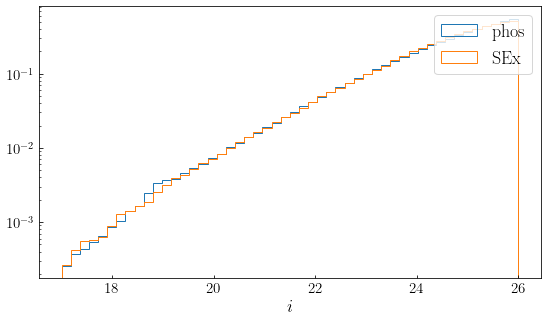

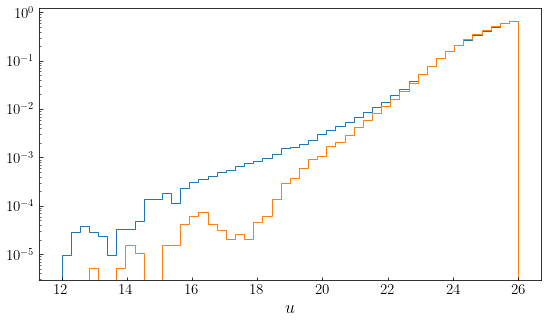

In [62]:
# mag distribution

fig, ax = plt.subplots(1, 1, figsize = (9,5))
plt.hist(pcat['i'],range=(17,26),bins=50,density=True,histtype='step',label='phos')
plt.hist(v9_cat['i'],range=(17,26),bins=50,density=True,histtype='step',label='SEx')
plt.legend(fontsize=18)
plt.xlabel('$i$',fontsize=18)
plt.yscale('log')

fig, ax = plt.subplots(1, 1, figsize = (9,5))
plt.hist(pcat['u'],range=(12,26),bins=50,density=True,histtype='step')
plt.hist(v9_cat['u'],range=(12,26),bins=50,density=True,histtype='step')
plt.xlabel('$u$',fontsize=18)
plt.yscale('log')

#### v9 with and without z_G
add in combined z column

In [4]:
cat_name = 'COSMOS_deep'
cat_compare = Table.read(graham_output_dir+cat_name+'_nonir_v9_v9pcat_compare.fits')

In [5]:
z_combine = []
for gal in cat_compare:
    cond_ch1 = ((gal['MAG_AUTO_CH1_CORR'] > 0.) & (gal['MAG_AUTO_CH1_CORR'] < 50.) & (gal['MAGERR_AUTO_CH1_CORR'] > 0.) & (gal['MAGERR_AUTO_CH1_CORR'] < 0.5))
    cond_ch2 = ((gal['MAG_AUTO_CH2_CORR'] > 0.) & (gal['MAG_AUTO_CH2_CORR'] < 50.) & (gal['MAGERR_AUTO_CH2_CORR'] > 0.) & (gal['MAGERR_AUTO_CH2_CORR'] < 0.5))
    flag_irac = int(cond_ch1) + int(cond_ch2)
    
    if gal['ZPHOT_G'] > 0 and flag_irac == 0:
        if 'COSMOS' in cat_name:
            z_combine.append(gal['ZPHOT_6B_G'])
        else:
            z_combine.append(gal['ZPHOT_G'])
    elif gal['Z_ML'] > 0:
        z_combine.append(gal['Z_ML'])
    else:
        z_combine.append(gal['Z_BEST'])

In [ ]:
col_z_combine = Column(data=z_combine,name='Z_COMBINE')
cat_compare.add_column(col_z_combine)
cat_compare.write(graham_output_dir+cat_name+'_nonir_v9_v9pcat_compare.fits', overwrite=True)

#### test dustmaps

In [15]:
from __future__ import print_function
import astropy.units as units
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

In [6]:
coords = SkyCoord('12h30m25.3s', '15d15m58.1s', frame='icrs')
sfd = SFDQuery()
ebv = sfd(coords)

coords = SkyCoord('12h30m25.3s', '15d15m58.1s', frame='icrs')
print('E(B-V) = {:.3f} mag'.format(ebv))

E(B-V) = 0.030 mag


In [29]:
l0, b0 = (180., 0.)
l = np.arange(l0 - 180., l0 + 179.9, 0.5)
b = np.arange(b0 - 90., b0 + 90., 0.5)
l, b = np.meshgrid(l, b)
coords = SkyCoord(l*units.deg, b*units.deg,
distance=1.*units.kpc, frame='galactic')

In [30]:
sfd = SFDQuery()
Av_sfd = 2.742 * sfd(coords)

In [63]:
coords = SkyCoord(150.114*units.deg,  2.202*units.deg)
ebv = sfd(coords)
print('COSMOS',coords.galactic,ebv)

coords = SkyCoord(352.059*units.deg,  -0.25*units.deg)
ebv = sfd(coords)
print('DEEP',coords.galactic,ebv)

coords = SkyCoord(242.768*units.deg, 54.982*units.deg)
ebv = sfd(coords)
print('ELAIS',coords.galactic,ebv)


COSMOS <SkyCoord (Galactic): (l, b) in deg
    (236.822, 42.115)> 0.018369185
DEEP <SkyCoord (Galactic): (l, b) in deg
    (82.877, -56.508)> 0.04013192
ELAIS <SkyCoord (Galactic): (l, b) in deg
    (84.857, 44.615)> 0.00791703


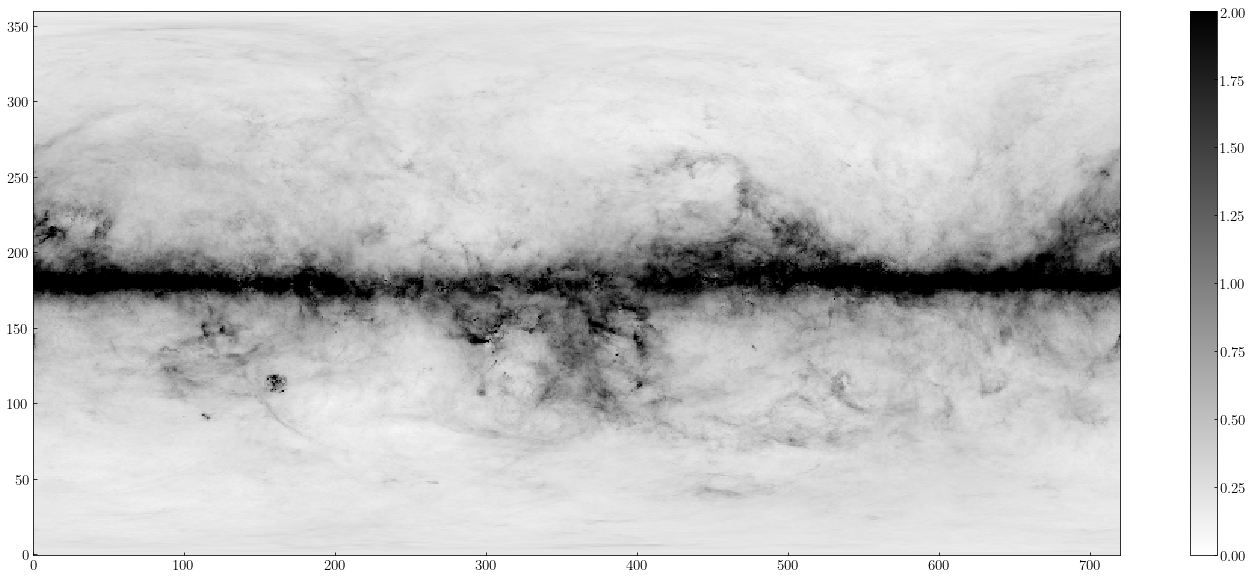

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (25,10))

Av = Av_sfd
title='SFD'
im = ax.imshow(
    np.sqrt(Av)[::,::-1],
    vmin=0.,
    vmax=2.,
    origin='lower',
    interpolation='nearest',
    cmap='binary',
    aspect='equal'
)

fig.subplots_adjust(wspace=0., hspace=0.)
cbar = fig.colorbar(im, ax=ax)